In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

# Directorio raíz
working_directory = "C:\\Users\\javie\\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\\MaestriaEnCienciaDeDatos\\4toSemestre\\ArquitecturaDeProductosDeDatos\\Tareas\\Tarea3\\APD_tarea_3"

# Directorio donde se almacenan los datos
data_directory = os.path.join(working_directory, "data")
# Asegurar que el directorio existe
os.makedirs(data_directory, exist_ok=True)

# Léemos los datos de entrenamiento del concurso de Kaggle
df = pd.read_csv(os.path.join(data_directory,"train.csv"))

# Análisis exploratorio

Hacemos un breve análisis exploratorio para conocer características relevantes de los datos:

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Podemos observar que se cuenta con 1,460 registros de casas. En total se tienen 79 variables más la variable de Id y el precio de venta de la casa. Nótese que se tienen variables númericas y categóricas.

In [63]:
print(df['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


El precio promedio de las casas es de $180,921.19 con una desviación estándar de $79,442.5. El precio más bajo registrado es de $34,900 y el máximo es de $755,000. Adicionalmente, en la siguiente figura podemos observar que la distribución de precios está sesgada a la derecha.

<Axes: xlabel='SalePrice', ylabel='Density'>

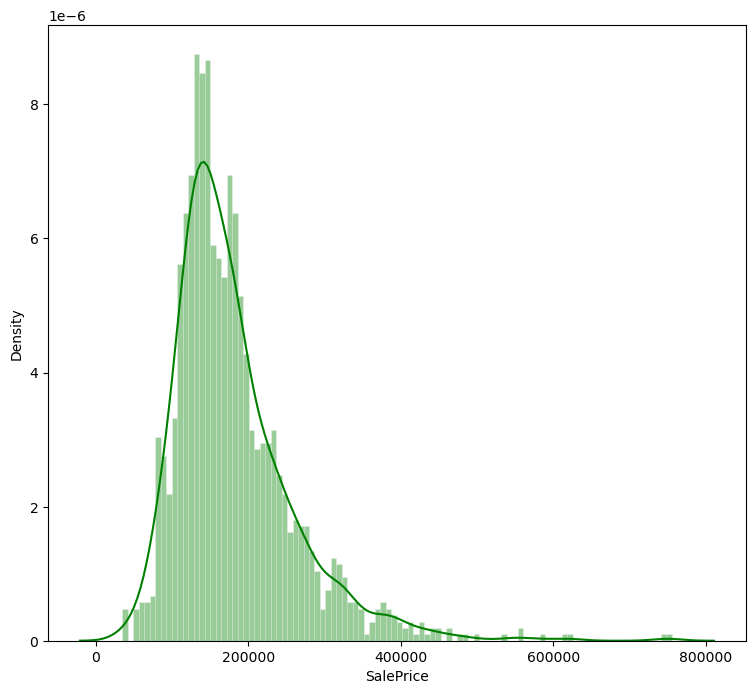

In [64]:
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), color='g', bins = 100)

In [65]:
#Analizamos los valores faltantes
valores_faltantes = df.isnull().sum()
total_registros = df.shape[0]

# Creamos un data frame para guardar la información de los valores faltantes
df_nulos = pd.DataFrame({
    'Valores faltantes': valores_faltantes.values,
    'Porcentaje': (valores_faltantes / total_registros) * 100
})

# Filtramos las columnas con valores faltantes
columnas_faltantes = df_nulos[df_nulos['Valores faltantes'] > 0]

print("\nColumnas con valores faltantes")
print(columnas_faltantes)


Columnas con valores faltantes
              Valores faltantes  Porcentaje
LotFrontage                 259   17.739726
Alley                      1369   93.767123
MasVnrType                  872   59.726027
MasVnrArea                    8    0.547945
BsmtQual                     37    2.534247
BsmtCond                     37    2.534247
BsmtExposure                 38    2.602740
BsmtFinType1                 37    2.534247
BsmtFinType2                 38    2.602740
Electrical                    1    0.068493
FireplaceQu                 690   47.260274
GarageType                   81    5.547945
GarageYrBlt                  81    5.547945
GarageFinish                 81    5.547945
GarageQual                   81    5.547945
GarageCond                   81    5.547945
PoolQC                     1453   99.520548
Fence                      1179   80.753425
MiscFeature                1406   96.301370


Notamos que las columnas $Alley, MasVnrType, FireplaceQu, PoolQC, Fence$ y $MiscFeature$ tienen un gran porcentaje de valores nulos. Por lo que se considerarán para el presente análisis.

In [66]:
df.drop(columns=['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)

Imputamos los valores faltantes de las demás columnas.

In [67]:
def fill_na(df):
    for column in df.columns:
        if df[column].isnull().any():
            if pd.api.types.is_numeric_dtype(df[column]):
                #Imputamos con la media para la variables numéricas
                df[column].fillna(df[column].mean(), inplace=True)
            else:
                #Imputamos con la moda para las variables categóricas
                df[column].fillna(str(df[column].mode()), inplace=True)
    return df

df = fill_na(df)
#df.isnull().sum().sum()

0

# Preprocesamiento

Convertimos las variables categoricas a one hot encoding

In [68]:
def onehot(df):
    df_aux=df
    i=0 
    for column in df.columns:
        if not(pd.api.types.is_numeric_dtype(df[column])):
            print(column)
            df1=pd.get_dummies(df[column],drop_first=True)
            
            df.drop([column],axis=1,inplace=True)
            if i==0:
                df_aux=df1.copy()
            else:  
                df_aux=pd.concat([df_aux,df1],axis=1)
            i=i+1
    df_aux=pd.concat([df,df_aux],axis=1)        
    return df_aux
df = onehot(df)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


# Modelo

In [72]:
# Eliminamos la columna de Id para entrenar el modelo
df.drop(columns="Id", inplace=True)
X = df.loc[:, df.columns!='SalePrice'].to_numpy()
Y = df["SalePrice"].to_numpy()

print(X.shape)
print(Y.shape)

Dividimos nuestros datos en conjunto de entrenamiento y conjunto de prueba con una proporción 80% y 20%.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f"{len(x_train)} registros en el conjunto de entrenamiento")
print(f"{len(x_test)} registros en el conjunto de prueba")

Creamos el modelo de regresión lineal

In [77]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

Evaluamos la $R^2$ del modelo en el conjunto de entrenamiento y de prueba.

In [78]:
print(f"R^2 en el conjunto de entrenamiento: {linreg.score(x_train, y_train):.3f}")
print(f"R^2 en el conjunto de prueba: {linreg.score(x_test, y_test):.3f}")

Classification score on the training set: 0.934
Classification score on the validation set: 0.886
